In [1]:
#Importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

#Importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#Importing 'warnings' to ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Displaying all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Importing the dataset
cancer_df = pd.read_csv('../data/cancer_reg.csv')

#Displaying the first 5 rows of the dataset
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
import math
cancer_df['annual_death_rate'] =  cancer_df['TARGET_deathRate'].map(lambda x: math.ceil(x / 6))
cancer_df.drop(columns = ['TARGET_deathRate'], inplace = True)

In [4]:
cancer_df['new_inc_rate'] =  cancer_df['incidenceRate'].map(lambda x: math.ceil(x / 6))
cancer_df.drop(columns = ['incidenceRate'], inplace = True)

In [5]:
#Checking column data types
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   medIncome                3047 non-null   int64  
 3   popEst2015               3047 non-null   int64  
 4   povertyPercent           3047 non-null   float64
 5   studyPerCap              3047 non-null   float64
 6   binnedInc                3047 non-null   object 
 7   MedianAge                3047 non-null   float64
 8   MedianAgeMale            3047 non-null   float64
 9   MedianAgeFemale          3047 non-null   float64
 10  Geography                3047 non-null   object 
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [6]:
#Checking for missing values and printing features with missing values
missing_values = cancer_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Features with missing values : \n{missing_values}", '\n')

#Checking the percentage of missing values
missing_percentage = cancer_df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"Percentage of missing values : \n{missing_percentage}")

Features with missing values : 
PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64 

Percentage of missing values : 
PctSomeCol18_24            74.991795
PctEmployed16_Over          4.988513
PctPrivateCoverageAlone    19.986872
dtype: float64


- From the above code cell output we understand that the features "PctSomeCol18_24" and "PctPrivateCoverageAlone" have missing data of more than 5% of the total data

- In order to decide whether to impute the missing data or drop the rows, we need to understand the correlation of individual features with the target variable "annual_death_rate"

In [7]:
#Checking correlation of features with missing values with the target variable
missing_values = missing_values.index.tolist()
for feature in missing_values:
    print(cancer_df[[feature, 'annual_death_rate']].corr())
    print('\n')

                   PctSomeCol18_24  annual_death_rate
PctSomeCol18_24            1.00000           -0.18764
annual_death_rate         -0.18764            1.00000


                    PctEmployed16_Over  annual_death_rate
PctEmployed16_Over            1.000000          -0.411473
annual_death_rate            -0.411473           1.000000


                         PctPrivateCoverageAlone  annual_death_rate
PctPrivateCoverageAlone                 1.000000          -0.363582
annual_death_rate                      -0.363582           1.000000




- From the above correlations we can see that "PctSomeCol18_24" has a weak correlationwith the target variable

- Most of the rows in the column are missing values, so we can drop the column

In [8]:
#Dropping "PctSomeCol18_24" column
cancer_df.drop(columns = ['PctSomeCol18_24'], inplace = True)

- The features "PctEmployed16_Over" and "PctPrivateCoverageAlone" have a strong correlation with the target variable.

- The percentage of missing values for "PctEmployed16_Over" is ~ 5%, so we will drop the rows with 'missing data'.

- The percentage of missing values for "PctPrivateCoverageAlone" is ~ 20% so we need to impute the missing values with mean of the column data. 

In [9]:
#Dropping rows with missing values in "PctEmployed16_Over" column
cancer_df.dropna(subset = ['PctEmployed16_Over'], inplace = True)

In [10]:
#Creating a copy of the "cancer_df" dataframe
cancer_df_cleaned = cancer_df.copy()

#Checking the shape of the cleaned dataset
cancer_df_cleaned.shape

(2895, 33)

In [11]:
#Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

#Creating an instance of SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

#Imputing missing values in the "PctPrivateCoverageAlone" column
cancer_df_cleaned['PctPrivateCoverageAlone'] = imputer.fit_transform(cancer_df_cleaned[['PctPrivateCoverageAlone']])

#Checking for missing values in the "PctPrivateCoverageAlone" column after imputation
cancer_df_cleaned['PctPrivateCoverageAlone'].isnull().sum()

0

In [12]:
#Checking the shape of the cleaned dataset
cancer_df_cleaned.shape

(2895, 33)

In [13]:
#Checking the correlation of 'PctPrivateCoverageAlone' with the target variable 'annual_death_rate' before imputation
before_impt_corr = cancer_df[['PctPrivateCoverageAlone', 'annual_death_rate']].corr()
print(f"Correlation before imputation : \n{before_impt_corr}", '\n')

#Checking the correlation of 'PctPrivateCoverageAlone' with the target variable 'annual_death_rate' after imputation
after_impt_corr = cancer_df_cleaned[['PctPrivateCoverageAlone', 'annual_death_rate']].corr()
print(f"Correlation after imputation : \n{after_impt_corr}")

Correlation before imputation : 
                         PctPrivateCoverageAlone  annual_death_rate
PctPrivateCoverageAlone                 1.000000          -0.360385
annual_death_rate                      -0.360385           1.000000 

Correlation after imputation : 
                         PctPrivateCoverageAlone  annual_death_rate
PctPrivateCoverageAlone                 1.000000          -0.323502
annual_death_rate                      -0.323502           1.000000


- Post missing value imputation the correlation of "PctPrivateCoverageAlone" with the target variable "annual_death_rate" is reduced by merely 0.037. This is not a significant change and hence can be considered okay.

In [14]:
#Displaying the features with missing values more than 0 in the cleaned dataset
missing_values_cleaned = cancer_df_cleaned.isnull().sum()
missing_values_cleaned = missing_values_cleaned[missing_values_cleaned > 0]
print(f"Features with missing values in the cleaned dataset : \n{missing_values_cleaned}")

Features with missing values in the cleaned dataset : 
Series([], dtype: int64)


- Now that we have handled missing data, let's encode the categorical features

In [15]:
#Display the categorical columns in the cleaned dataset
categorical_columns = cancer_df_cleaned.select_dtypes(include = ['object']).columns
print(f"Categorical columns in the cleaned dataset : \n{categorical_columns}")

Categorical columns in the cleaned dataset : 
Index(['binnedInc', 'Geography'], dtype='object')


In [16]:
#Display the unique values in the 'binnedInc' column and number of unique values
unique_binnedInc = cancer_df_cleaned['binnedInc'].unique()
print(f"Unique values in the 'binnedInc' column : \n{unique_binnedInc}")
print(f"Number of unique values in the 'binnedInc' column : \n{len(unique_binnedInc)}", '\n')

#Display the unique values in the 'Geography' column and number of unique values
unique_Geography = cancer_df_cleaned['Geography'].unique()
print(f"Unique values in the 'Geography' column : \n{unique_Geography}")
print(f"Number of unique values in the 'Geography' column : \n{len(unique_Geography)}")

Unique values in the 'binnedInc' column : 
['(61494.5, 125635]' '(48021.6, 51046.4]' '(42724.4, 45201]'
 '(51046.4, 54545.6]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(54545.6, 61494.5]' '(34218.1, 37413.8]' '[22640, 34218.1]'
 '(45201, 48021.6]']
Number of unique values in the 'binnedInc' column : 
10 

Unique values in the 'Geography' column : 
['Kitsap County, Washington' 'Kittitas County, Washington'
 'Klickitat County, Washington' ... 'Finney County, Kansas'
 'Ford County, Kansas' 'Geary County, Kansas']
Number of unique values in the 'Geography' column : 
2895


- From the above cell output we understand that the categorical feature "Geography" contains unique value for all the records in the dataset. Since this will make the data absolutely specific and lead to overfitting, we need to drop this column.

- We have 10 unique values for the categorical column "binnedInc". Clearly we can see this shows the income ranges (This means median income per capita lies within this range). So in order to handle this categorical feature, "Ordinal Encoding" would be the best fit.

In [17]:
#Change ']' to ')' in 'binnedInc' column
cancer_df_cleaned['binnedInc'] = cancer_df_cleaned['binnedInc'].str.replace(']', ')')
cancer_df_cleaned['binnedInc'] = cancer_df_cleaned['binnedInc'].str.replace('[', '(')
#Printing the unique values in the 'binnedInc' column after modification
cancer_df_cleaned['binnedInc'].unique()

array(['(61494.5, 125635)', '(48021.6, 51046.4)', '(42724.4, 45201)',
       '(51046.4, 54545.6)', '(37413.8, 40362.7)', '(40362.7, 42724.4)',
       '(54545.6, 61494.5)', '(34218.1, 37413.8)', '(22640, 34218.1)',
       '(45201, 48021.6)'], dtype=object)

In [18]:
#Dropping the 'Geography' column from the cleaned dataset
cancer_df_cleaned.drop(columns = ['Geography'], inplace = True)

In [19]:
#Import the OrdinalEncoder from sklearn
from sklearn.preprocessing import OrdinalEncoder

#Creating an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [['(22640, 34218.1)', '(34218.1, 37413.8)', '(37413.8, 40362.7)', '(40362.7, 42724.4)',
                                                 '(42724.4, 45201)', '(45201, 48021.6)', '(48021.6, 51046.4)', '(51046.4, 54545.6)',
                                                 '(54545.6, 61494.5)', '(61494.5, 125635)']], dtype=np.int64)

#Performing Ordinal Encoding on the 'binnedInc' column
cancer_df_cleaned['binnedInc_encoded'] = ordinal_encoder.fit_transform(cancer_df_cleaned[['binnedInc']])

#Displaying the unique values in the 'binnedInc_encdoded' column and number of unique values after encoding
unique_binnedInc_encoded = cancer_df_cleaned['binnedInc_encoded'].unique()
print(f"Unique values in the 'binnedInc_encdoded' column : \n{unique_binnedInc_encoded}")
print(f"Number of unique values in the 'binnedInc_encoded' column : \n{len(unique_binnedInc_encoded)}")

Unique values in the 'binnedInc_encdoded' column : 
[9 6 4 7 2 3 8 1 0 5]
Number of unique values in the 'binnedInc_encoded' column : 
10


In [20]:
#Dropping the 'binnedInc' column from the cleaned dataset
cancer_df_cleaned.drop(columns = ['binnedInc'], inplace = True)

#Displaying the column information of the cleaned dataset
cancer_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2895 non-null   float64
 1   avgDeathsPerYear         2895 non-null   int64  
 2   medIncome                2895 non-null   int64  
 3   popEst2015               2895 non-null   int64  
 4   povertyPercent           2895 non-null   float64
 5   studyPerCap              2895 non-null   float64
 6   MedianAge                2895 non-null   float64
 7   MedianAgeMale            2895 non-null   float64
 8   MedianAgeFemale          2895 non-null   float64
 9   AvgHouseholdSize         2895 non-null   float64
 10  PercentMarried           2895 non-null   float64
 11  PctNoHS18_24             2895 non-null   float64
 12  PctHS18_24               2895 non-null   float64
 13  PctBachDeg18_24          2895 non-null   float64
 14  PctHS25_Over             2895

- Now all the features are 'non-null' and 'numerical'

- Handling the Outliers (if any)

In [21]:
#Checking for outliers in all the numerical columns
numerical_columns = cancer_df_cleaned.select_dtypes(include = ['int64', 'float64']).columns

#Checking the outliers in a non-graphical way
Q1 = cancer_df_cleaned[numerical_columns].quantile(0.25)
Q3 = cancer_df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((cancer_df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (cancer_df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

#Displaying the outliers
print(f"Outliers in the numerical columns : \n{outliers}")

Outliers in the numerical columns : 
avgAnnCount                439
avgDeathsPerYear           331
medIncome                  114
popEst2015                 393
povertyPercent              64
studyPerCap                481
MedianAge                   87
MedianAgeMale               75
MedianAgeFemale             65
AvgHouseholdSize           187
PercentMarried              64
PctNoHS18_24                68
PctHS18_24                  51
PctBachDeg18_24             92
PctHS25_Over                32
PctBachDeg25_Over           75
PctEmployed16_Over          20
PctUnemployed16_Over        65
PctPrivateCoverage          20
PctPrivateCoverageAlone     57
PctEmpPrivCoverage          10
PctPublicCoverage           13
PctPublicCoverageAlone      35
PctWhite                   165
PctBlack                   363
PctAsian                   308
PctOtherRace               284
PctMarriedHouseholds       100
BirthRate                  157
annual_death_rate           38
new_inc_rate                83
bi

In [22]:
#Displaying the percentage of outliers
percentage_outliers = (outliers / cancer_df_cleaned.shape[0]) * 100
print(f"Percentage of outliers in the numerical columns : \n{percentage_outliers}")

Percentage of outliers in the numerical columns : 
avgAnnCount                15.164076
avgDeathsPerYear           11.433506
medIncome                   3.937824
popEst2015                 13.575130
povertyPercent              2.210708
studyPerCap                16.614853
MedianAge                   3.005181
MedianAgeMale               2.590674
MedianAgeFemale             2.245250
AvgHouseholdSize            6.459413
PercentMarried              2.210708
PctNoHS18_24                2.348877
PctHS18_24                  1.761658
PctBachDeg18_24             3.177893
PctHS25_Over                1.105354
PctBachDeg25_Over           2.590674
PctEmployed16_Over          0.690846
PctUnemployed16_Over        2.245250
PctPrivateCoverage          0.690846
PctPrivateCoverageAlone     1.968912
PctEmpPrivCoverage          0.345423
PctPublicCoverage           0.449050
PctPublicCoverageAlone      1.208981
PctWhite                    5.699482
PctBlack                   12.538860
PctAsian                

- Following features have outliers percentage more than 10%:
    "avgAnnCount", "avgDeathsPerYear", "popEst2015", "studyPerCap", "PctBlack", "PctAsian"

- The feature "PctOtherRace" has ~ 10% of the data points as outliers

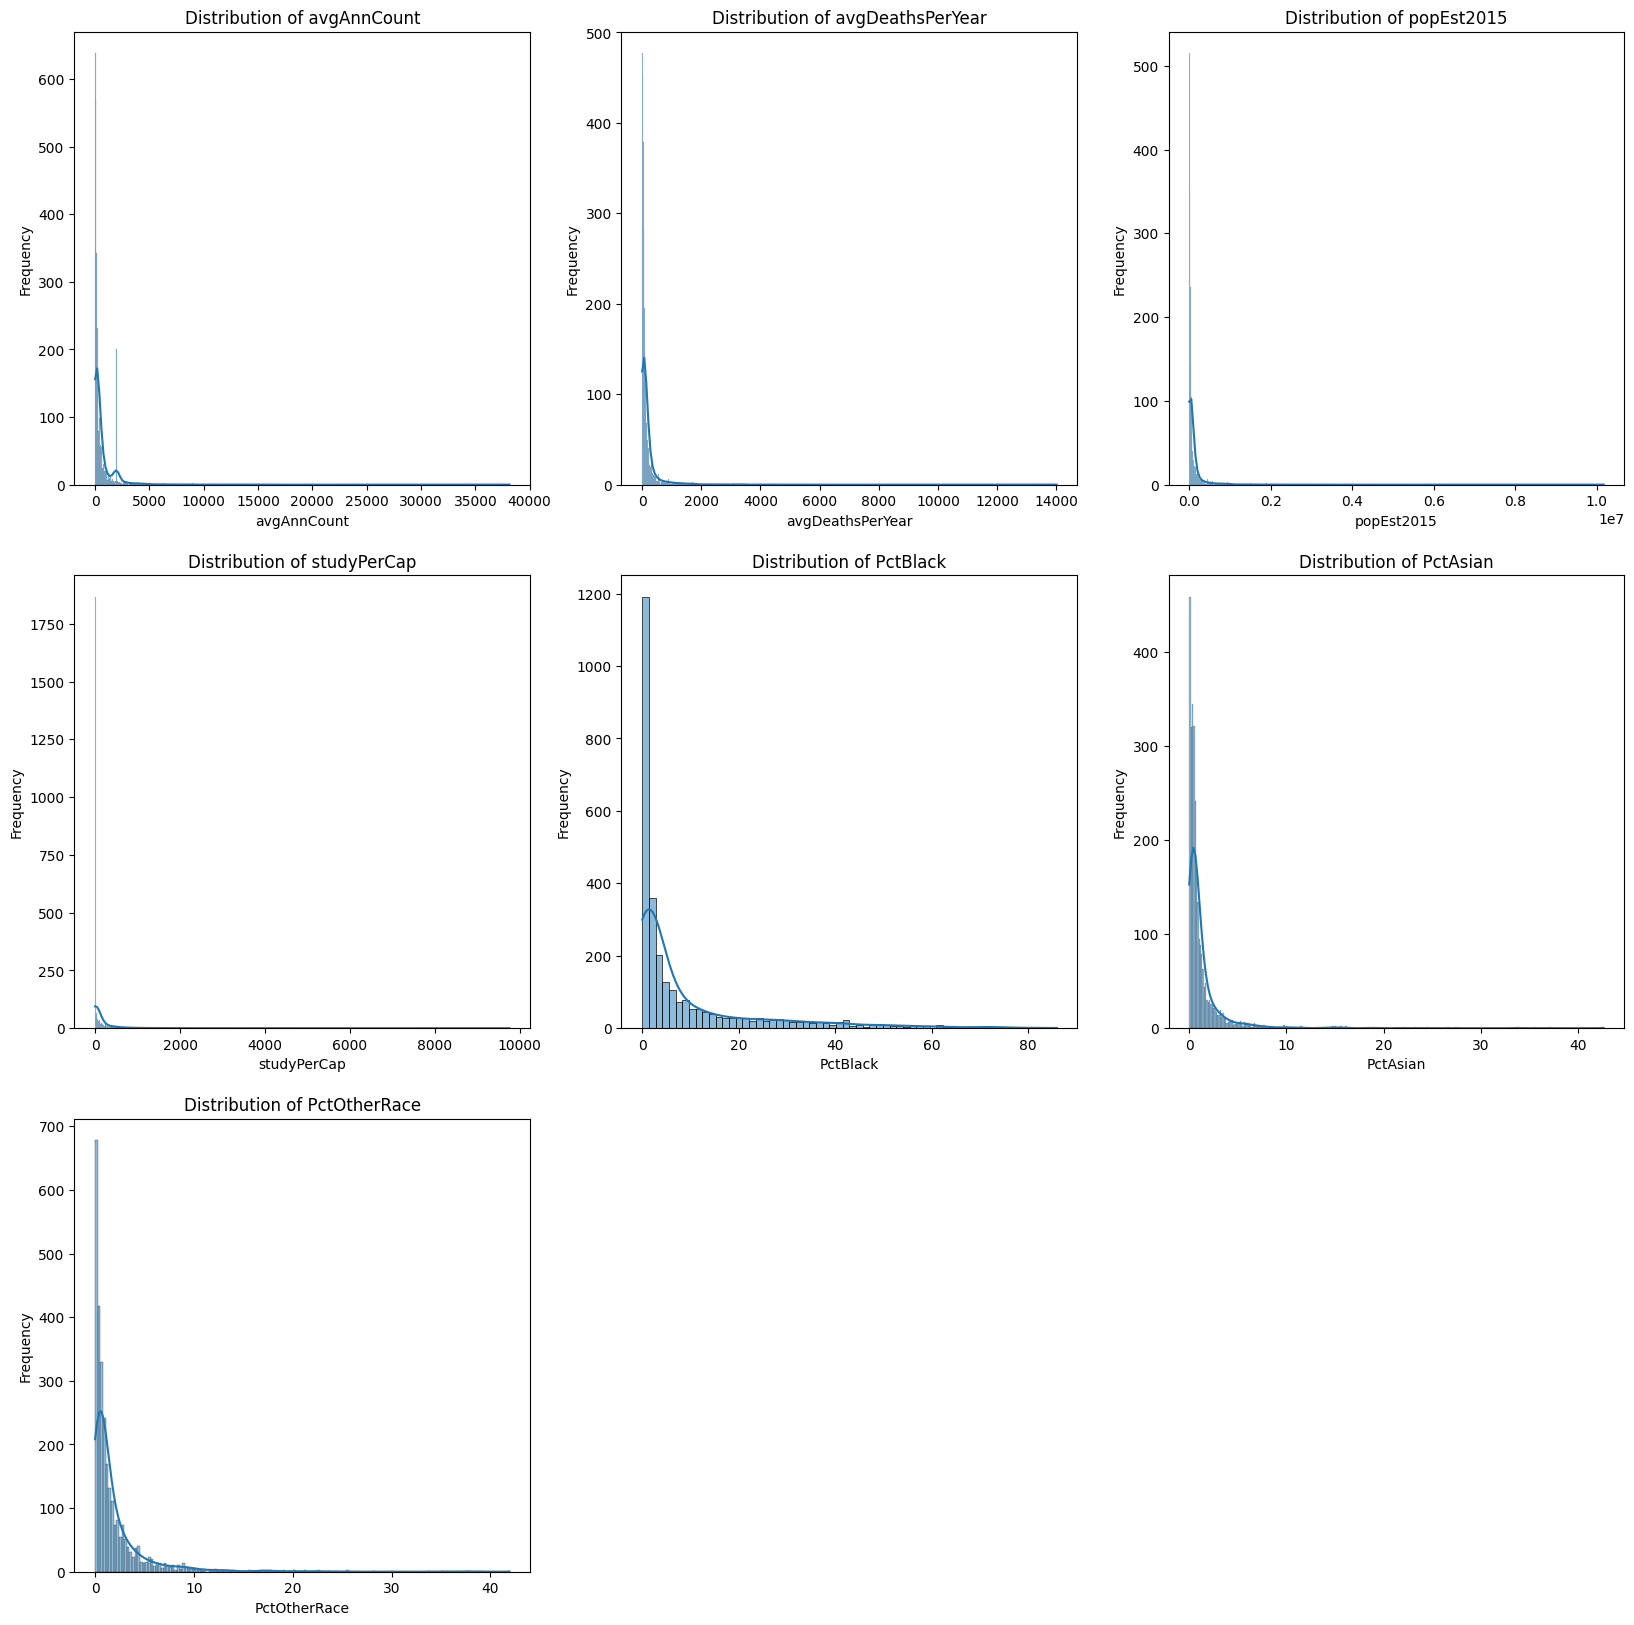

In [23]:
#Plotting the distribution of the features mentioned above
new_features = ["avgAnnCount", "avgDeathsPerYear", "popEst2015", "studyPerCap", "PctBlack", "PctAsian","PctOtherRace"]

#Plot histograms for the features mentioned above
plt.figure(figsize = (20, 20))
for i, feature in enumerate(new_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cancer_df_cleaned[feature], kde = True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

- As seen from the histogram plots above, we can see that all the features are highly skewed.

- Checking their distributions after applying log transformation

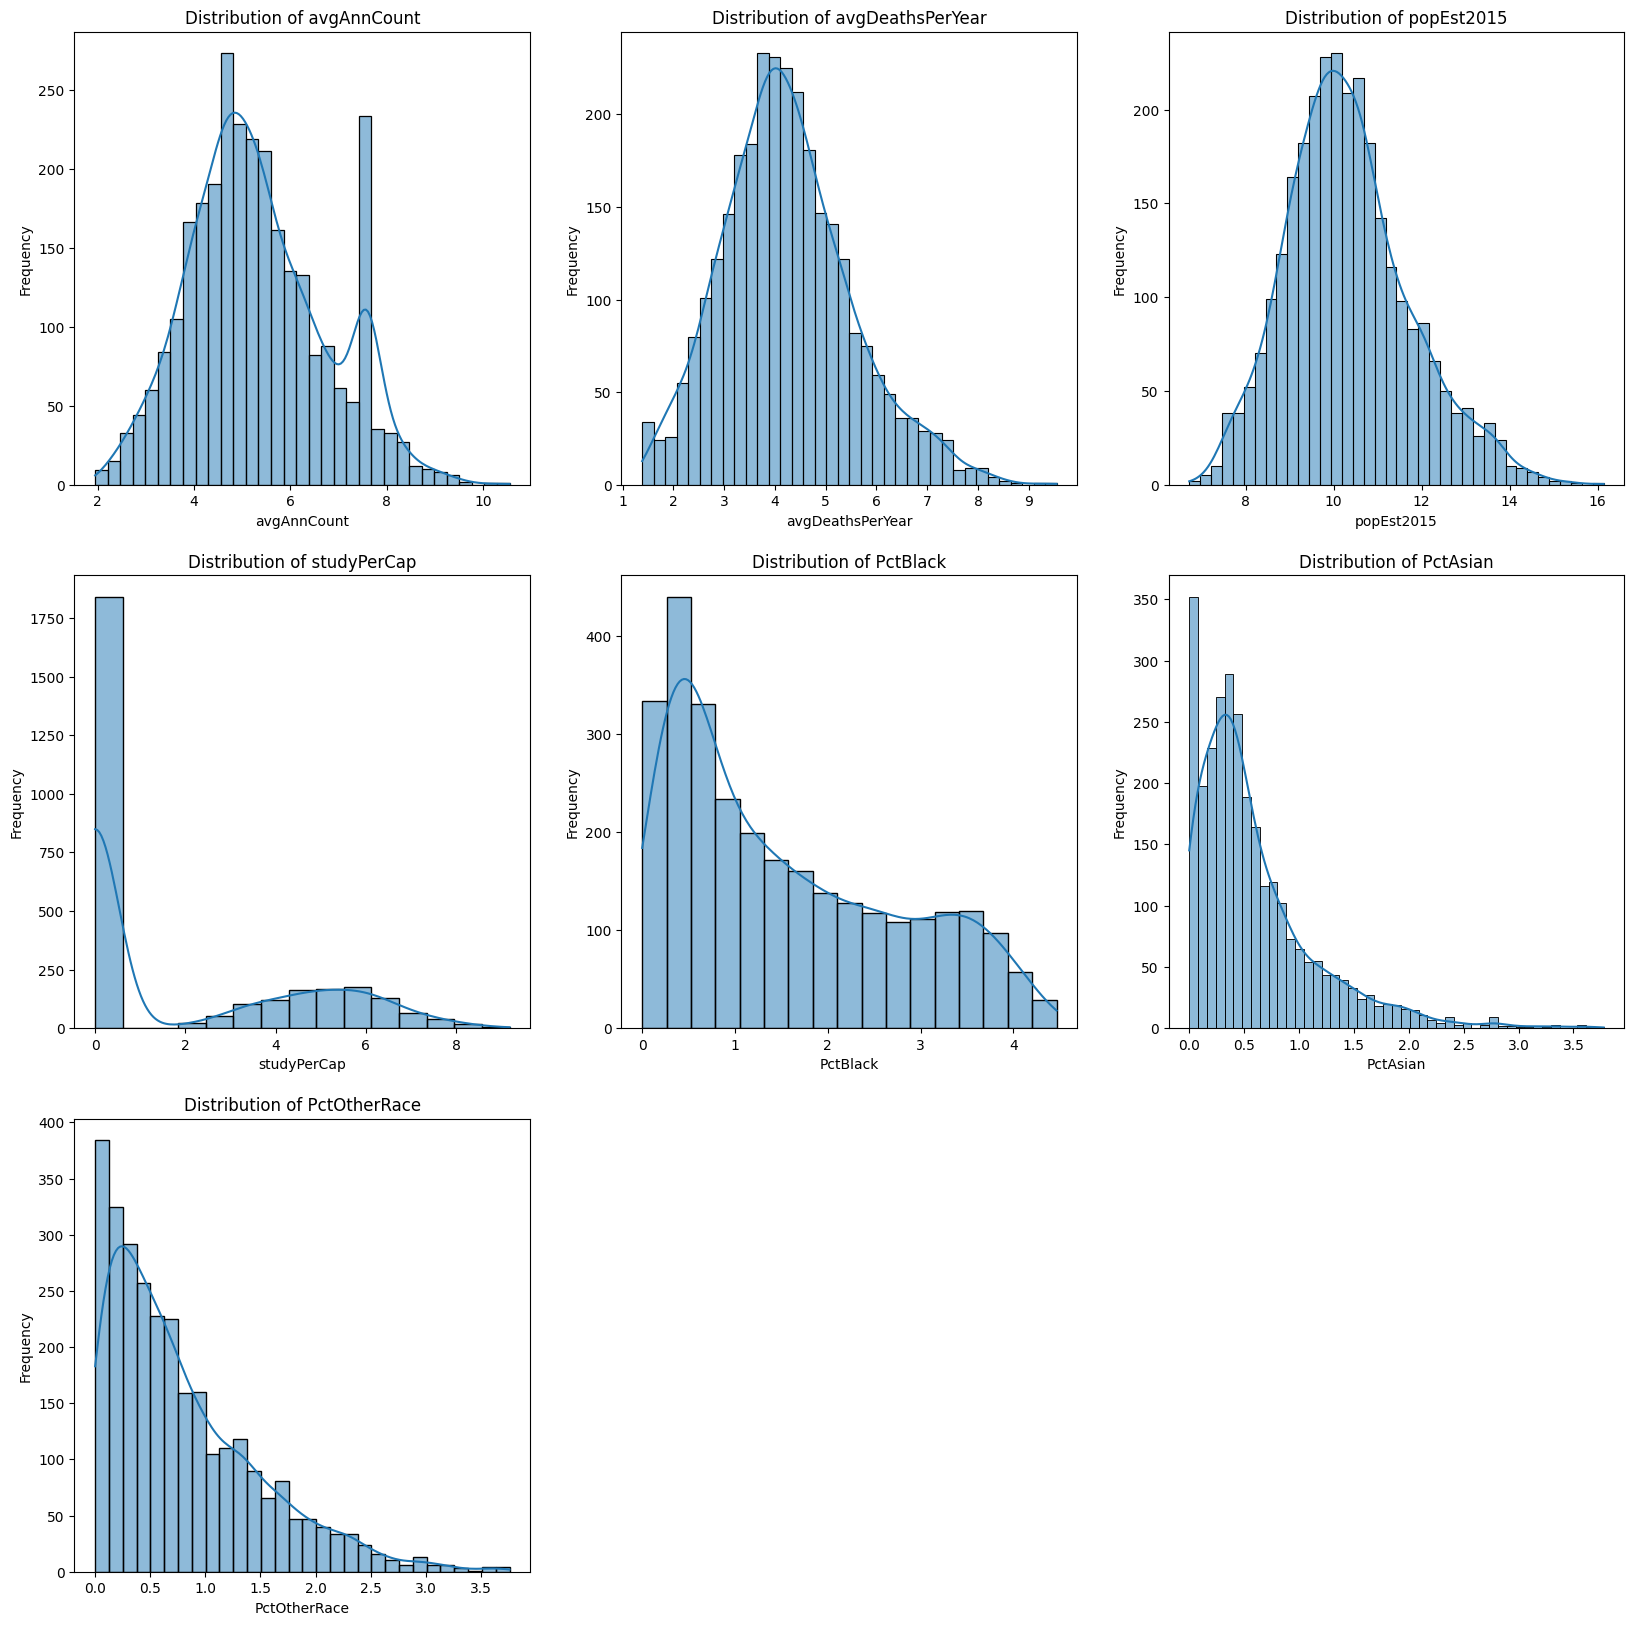

In [24]:
#Creating a copy of the cleaned dataset
cancer_df_cleaned_outliers = cancer_df_cleaned.copy()

#Applying log transformation to the features mentioned above
for feature in new_features:
    cancer_df_cleaned_outliers[feature] = np.log1p(cancer_df_cleaned_outliers[feature])

#Plot histograms for the features mentioned above after log transformation
plt.figure(figsize = (20, 20))
for i, feature in enumerate(new_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cancer_df_cleaned_outliers[feature], kde = True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

- From the above plots we understand that after applying log transformation, the distribution of following features has improved significantly : "avgDeathsPerYear", "popEst2015"

- The following 5 features still need to be worked on : "avgAnnCount", "studyPerCap", "PctBlack", "PctAsian", "PctOtherRace". Applying Box-Cox transformation on these 5 features.

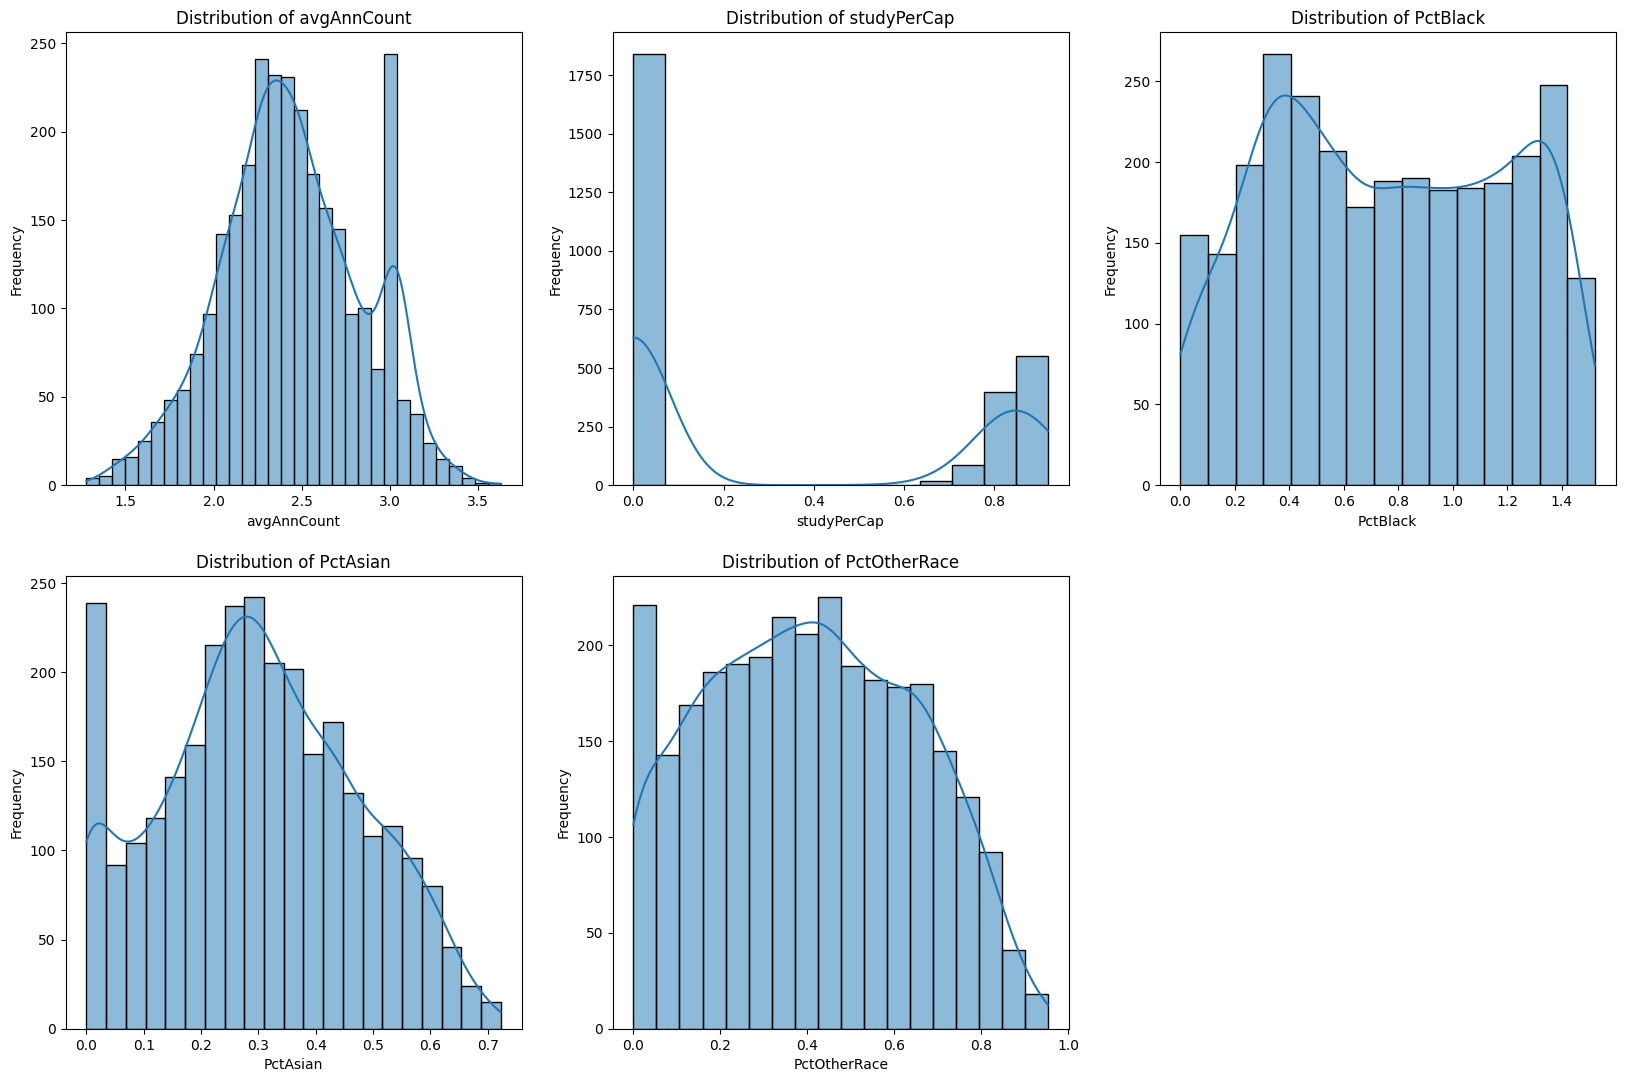

In [25]:
#Applying box-cox transformation to the features mentioned above
from scipy.stats import boxcox

features_2 = ["avgAnnCount", "studyPerCap", "PctBlack", "PctAsian", "PctOtherRace"]

for feature in features_2:
    cancer_df_cleaned_outliers[feature], _ = boxcox(cancer_df_cleaned_outliers[feature] + 1)

#Plot histograms for the features mentioned above after box-cox transformation
plt.figure(figsize = (20, 20))
for i, feature in enumerate(features_2):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cancer_df_cleaned_outliers[feature], kde = True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

- Further transformation might not be needed and we can treat these features as inherently skewed.

 - Feature Scaling

In [26]:
#Scaling the features using StandardScaler

#Creating an instance of StandardScaler
scaler = StandardScaler().set_output(transform='pandas')

cancer_df_cleaned_outliers_without_target = cancer_df_cleaned_outliers.copy()
#Scaling the features
cancer_df_cleaned_outliers_scaled = scaler.fit_transform(cancer_df_cleaned_outliers_without_target.drop(columns = ['annual_death_rate']))

#Displaying the first 5 rows of the dataset after scaling
cancer_df_cleaned_outliers_scaled.head()

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,new_inc_rate,binnedInc_encoded
0,1.299664,1.490721,1.236695,1.516071,-0.889667,1.406097,-0.130471,-0.515803,-0.091599,0.143559,0.106115,-0.831022,0.490987,0.159380,-1.655696,1.186128,-0.270958,0.041232,1.014166,0.000000,0.047120,-0.435643,-0.862388,-0.111935,0.052112,1.720301,0.662976,0.249813,0.240832,0.779439,1.569657
1,-0.044367,0.016828,0.093408,0.244856,0.262219,1.147637,-0.272083,-1.414303,-1.607887,-0.326981,-1.057089,-1.497645,-1.388514,0.291046,-1.256602,1.764599,0.210180,-0.016727,0.553813,0.600370,0.259042,-0.665335,-0.649796,0.343596,-0.603797,1.230763,1.191805,-0.897719,-0.651534,-0.699024,0.527738
2,-0.431605,-0.241177,0.194777,-0.266578,-0.360422,1.235420,-0.002346,0.841505,0.685498,0.331775,0.353296,0.712089,0.172242,0.729936,-0.829002,0.514355,-0.992664,-0.248561,-0.056860,-0.539035,-0.662815,0.738338,0.298691,0.447185,-0.772081,-0.177067,0.973012,0.493438,-0.953168,-1.836304,0.527738
3,0.569934,0.836045,-0.229047,0.642956,0.028729,1.386346,-0.051798,0.497399,0.230612,0.096505,0.135195,0.242983,0.677838,-0.806177,-0.458416,-0.735888,-0.703982,1.229380,-0.554793,-0.893025,-0.652219,1.146679,0.936466,0.497490,-0.737775,0.680441,0.411927,-0.031499,-0.516237,-0.357840,-0.166875
4,-0.885722,-0.737131,0.245171,-0.770839,-0.687309,-0.755287,0.071831,1.567952,1.273060,-0.326981,0.876737,-0.411296,0.875681,-0.915899,-0.201856,0.327752,-0.716010,-0.886104,-0.254154,-0.494786,-0.641623,0.980790,0.560342,0.641791,-1.278252,0.157883,-0.445082,0.429433,0.579555,-1.836304,0.527738


In [27]:
#Creating X and y
X = cancer_df_cleaned_outliers_scaled
y = cancer_df_cleaned_outliers['annual_death_rate']

#Print the features names
features = X.columns
print(f"Features : \n{features}")

target = y.name
print(f"Target : \n{target}")

Features : 
Index(['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015',
       'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'new_inc_rate',
       'binnedInc_encoded'],
      dtype='object')
Target : 
annual_death_rate


In [28]:
X.to_csv('../data/Features_1_T.csv', index=False)

- Feature Engineering

In [29]:
#Checking the features in X with corelation greater than 0.5 with the target variable y
corr_matrix = pd.concat([X,y], axis=1).corr()
corr_y = abs(corr_matrix[target])
high_corr = corr_y[corr_y > 0.3]

#Displaying the features with correlation greater than 0.3 with the target variable y
print(f"Features with correlation greater than 0.3 with the target variable y : \n{high_corr}")

Features with correlation greater than 0.3 with the target variable y : 
medIncome                  0.424652
povertyPercent             0.425231
PctHS25_Over               0.402696
PctBachDeg25_Over          0.481118
PctEmployed16_Over         0.411473
PctUnemployed16_Over       0.374073
PctPrivateCoverage         0.385109
PctPrivateCoverageAlone    0.323502
PctPublicCoverage          0.401198
PctPublicCoverageAlone     0.447515
new_inc_rate               0.433366
binnedInc_encoded          0.440103
annual_death_rate          1.000000
Name: annual_death_rate, dtype: float64


In [30]:
#Creating X_new with the features having correlation greater than 0.3 with the target variable y
highly_correlated_features = ['medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over',
                              'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
                              'PctPrivateCoverageAlone', 'PctPublicCoverage', 'PctPublicCoverageAlone',
                              'new_inc_rate', 'binnedInc_encoded']

X_new = X[highly_correlated_features]

#Displaying the first 5 rows of the dataset after selecting the features
X_new.head()

,medIncome,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctPublicCoverage,PctPublicCoverageAlone,new_inc_rate,binnedInc_encoded
0,1.236695,-0.889667,-1.655696,1.186128,-0.270958,0.041232,1.014166,0.000000,-0.435643,-0.862388,0.779439,1.569657
1,0.093408,0.262219,-1.256602,1.764599,0.210180,-0.016727,0.553813,0.600370,-0.665335,-0.649796,-0.699024,0.527738
2,0.194777,-0.360422,-0.829002,0.514355,-0.992664,-0.248561,-0.056860,-0.539035,0.738338,0.298691,-1.836304,0.527738
3,-0.229047,0.028729,-0.458416,-0.735888,-0.703982,1.229380,-0.554793,-0.893025,1.146679,0.936466,-0.357840,-0.166875
4,0.245171,-0.687309,-0.201856,0.327752,-0.716010,-0.886104,-0.254154,-0.494786,0.980790,0.560342,-1.836304,0.527738


In [31]:
X_new.to_csv('../data/Features_2_Correlation.csv', index=False)

In [32]:
#Using polynomial features
from sklearn.preprocessing import PolynomialFeatures

#Creating an instance of PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias = False).set_output(transform='pandas')

#Creating polynomial features
X_poly = poly.fit_transform(X_new)

#Displaying the shape of the dataset after creating polynomial features
X_poly.shape

(2895, 78)

In [33]:
#Displaying the first 5 rows of the dataset after creating polynomial features
X_poly.head()

,medIncome,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctPublicCoverage,PctPublicCoverageAlone,new_inc_rate,binnedInc_encoded,medIncome povertyPercent,medIncome PctHS25_Over,medIncome PctBachDeg25_Over,medIncome PctEmployed16_Over,medIncome PctUnemployed16_Over,medIncome PctPrivateCoverage,medIncome PctPrivateCoverageAlone,medIncome PctPublicCoverage,medIncome PctPublicCoverageAlone,medIncome new_inc_rate,medIncome binnedInc_encoded,povertyPercent PctHS25_Over,povertyPercent PctBachDeg25_Over,povertyPercent PctEmployed16_Over,povertyPercent PctUnemployed16_Over,povertyPercent PctPrivateCoverage,povertyPercent PctPrivateCoverageAlone,povertyPercent PctPublicCoverage,povertyPercent PctPublicCoverageAlone,povertyPercent new_inc_rate,povertyPercent binnedInc_encoded,PctHS25_Over PctBachDeg25_Over,PctHS25_Over PctEmployed16_Over,PctHS25_Over PctUnemployed16_Over,PctHS25_Over PctPrivateCoverage,PctHS25_Over PctPrivateCoverageAlone,PctHS25_Over PctPublicCoverage,PctHS25_Over PctPublicCoverageAlone,PctHS25_Over new_inc_rate,PctHS25_Over binnedInc_encoded,PctBachDeg25_Over PctEmployed16_Over,PctBachDeg25_Over PctUnemployed16_Over,PctBachDeg25_Over PctPrivateCoverage,PctBachDeg25_Over PctPrivateCoverageAlone,PctBachDeg25_Over PctPublicCoverage,PctBachDeg25_Over PctPublicCoverageAlone,PctBachDeg25_Over new_inc_rate,PctBachDeg25_Over binnedInc_encoded,PctEmployed16_Over PctUnemployed16_Over,PctEmployed16_Over PctPrivateCoverage,PctEmployed16_Over PctPrivateCoverageAlone,PctEmployed16_Over PctPublicCoverage,PctEmployed16_Over PctPublicCoverageAlone,PctEmployed16_Over new_inc_rate,PctEmployed16_Over binnedInc_encoded,PctUnemployed16_Over PctPrivateCoverage,PctUnemployed16_Over PctPrivateCoverageAlone,PctUnemployed16_Over PctPublicCoverage,PctUnemployed16_Over PctPublicCoverageAlone,PctUnemployed16_Over new_inc_rate,PctUnemployed16_Over binnedInc_encoded,PctPrivateCoverage PctPrivateCoverageAlone,PctPrivateCoverage PctPublicCoverage,PctPrivateCoverage PctPublicCoverageAlone,PctPrivateCoverage new_inc_rate,PctPrivateCoverage binnedInc_encoded,PctPrivateCoverageAlone PctPublicCoverage,PctPrivateCoverageAlone PctPublicCoverageAlone,PctPrivateCoverageAlone new_inc_rate,PctPrivateCoverageAlone binnedInc_encoded,PctPublicCoverage PctPublicCoverageAlone,PctPublicCoverage new_inc_rate,PctPublicCoverage binnedInc_encoded,PctPublicCoverageAlone new_inc_rate,PctPublicCoverageAlone binnedInc_encoded,new_inc_rate binnedInc_encoded
0,1.236695,-0.889667,-1.655696,1.186128,-0.270958,0.041232,1.014166,0.000000,-0.435643,-0.862388,0.779439,1.569657,-1.100246,-2.047590,1.466878,-0.335092,0.050991,1.254213,0.000000,-0.538758,-1.066511,0.963928,1.941186,1.473018,-1.055259,0.241062,-0.036682,-0.902270,-0.000000,0.387577,0.767238,-0.693441,-1.396472,-1.963867,0.448624,-0.068267,-1.679150,-0.000000,0.721293,1.427853,-1.290514,-2.598874,-0.321391,0.048906,1.202931,0.000000,-0.516729,-1.022903,0.924515,1.861814,-0.011172,-0.274796,-0.000000,0.118041,0.233671,-0.211195,-0.425311,0.041816,0.000000,-0.017962,-0.035558,0.032138,0.064719,0.000000,-0.441815,-0.874605,0.790481,1.591893,-0.000000,-0.000000,0.000000,0.000000,0.375694,-0.339557,-0.683811,-0.672179,-1.353654,1.223452
1,0.093408,0.262219,-1.256602,1.764599,0.210180,-0.016727,0.553813,0.600370,-0.665335,-0.649796,-0.699024,0.527738,0.024493,-0.117376,0.164827,0.019632,-0.001562,0.051730,0.056079,-0.062147,-0.060696,-0.065294,0.049295,-0.329505,0.462711,0.055113,-0.004386,0.145220,0.157428,-0.174464,-0.170389,-0.183297,0.138383,-2.217399,-0.264113,0.021019,-0.695922,-0.754427,0.836062,0.816536,0.878395,-0.663157,0.370883,-0.029516,0.977257,1.059413,-1.174050,-1.146630,-1.233497,0.931246,-0.003516,0.116400,0.126186,-0.139840,-0.136574,-0.146921,0.110920,-0.009264,-0.010042,0.011129,0.010869,0.011692,-0.008827,0.332493,-0.368471,-0.359866,-0.387129,0.292268,-0.399447,-0.390118,-0.419673,0.316838,0.432332,0.465085,-0.351123,0.454223

In [34]:
X_poly.to_csv('../data/Features_3_Polynomial.csv', index=False)

In [35]:
#Import OLS from statsmodels
import statsmodels.api as sm

#Adding a constant to the X_with_interaction_df
X_poly = sm.add_constant(X_poly)

#Checking the indices of X_poly and y are aligned
print("Are the indices of X_poly and y aligned? :", X_poly.index.equals(y.index))

Are the indices of X_poly and y aligned? : True


## Variance Infation Check on X_poly and X

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X_poly is your feature set
# Add a constant to the feature matrix (to account for intercept in VIF calculations)
X_with_const = sm.add_constant(X_poly)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif)


                                           Feature         VIF
0                                            const    5.934851
1                                        medIncome   70.484342
2                                   povertyPercent   15.715978
3                                     PctHS25_Over    3.666507
4                                PctBachDeg25_Over    6.997877
5                               PctEmployed16_Over    6.689509
6                             PctUnemployed16_Over    4.098251
7                               PctPrivateCoverage   16.504267
8                          PctPrivateCoverageAlone    6.170807
9                                PctPublicCoverage   15.970531
10                          PctPublicCoverageAlone   22.528559
11                                    new_inc_rate    1.408433
12                               binnedInc_encoded   36.850935
13                        medIncome povertyPercent  125.839759
14                          medIncome PctHS25_Over   52

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Assuming X_poly is your feature set
# Add a constant to the feature matrix (to account for intercept in VIF calculations)
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif)

                    Feature         VIF
0                     const    1.000000
1               avgAnnCount    3.454820
2          avgDeathsPerYear  100.135215
3                 medIncome    9.467494
4                popEst2015  115.300519
5            povertyPercent   10.077966
6               studyPerCap    1.720985
7                 MedianAge    1.025693
8             MedianAgeMale   10.038026
9           MedianAgeFemale   11.501230
10         AvgHouseholdSize    1.377350
11           PercentMarried   12.127885
12             PctNoHS18_24    1.701289
13               PctHS18_24    1.655829
14          PctBachDeg18_24    1.964397
15             PctHS25_Over    3.975874
16        PctBachDeg25_Over    5.980834
17       PctEmployed16_Over    7.008769
18     PctUnemployed16_Over    2.799579
19       PctPrivateCoverage   18.232853
20  PctPrivateCoverageAlone    4.856689
21       PctEmpPrivCoverage    8.567961
22        PctPublicCoverage   27.836453
23   PctPublicCoverageAlone   24.911588


- A high VIF was observed when we took interaction affect into account, usually VIF above 20 is an issue however we see interacted features with very high VIF upto 125. 
- on other hand the original data X has low VIF compartively.
- For a better feature selection we can now proceed with the original data to keep it simple or we can just go ahead with X_poly and drop out high VIF Features.

## Filtering out variables based on importance and VIF from X_poly

- Since for our original data the VIF maxed till 30 (except few outliers), lets keep the threshold at 30

In [38]:
X_with_const = sm.add_constant(X_poly)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_sorted = vif.sort_values(by="VIF", ascending=False)

# Display the sorted VIF values
print(vif_sorted)

                                           Feature         VIF
21                medIncome PctPublicCoverageAlone  324.543743
20                     medIncome PctPublicCoverage  237.504810
18                    medIncome PctPrivateCoverage  200.066306
77        PctPublicCoverageAlone binnedInc_encoded  143.855943
13                        medIncome povertyPercent  125.839759
68            PctPrivateCoverage binnedInc_encoded  101.694369
31           povertyPercent PctPublicCoverageAlone   99.723732
75             PctPublicCoverage binnedInc_encoded   93.412188
28               povertyPercent PctPrivateCoverage   92.250901
47             PctBachDeg25_Over PctPublicCoverage   82.863096
15                     medIncome PctBachDeg25_Over   81.641971
48        PctBachDeg25_Over PctPublicCoverageAlone   80.881294
70  PctPrivateCoverageAlone PctPublicCoverageAlone   72.502950
1                                        medIncome   70.484342
16                    medIncome PctEmployed16_Over   67

In [39]:
# Set the VIF threshold
threshold = 30

# Drop features with VIF above the threshold
features_to_drop = vif_sorted[vif_sorted["VIF"] > threshold]["Feature"]
X_reduced = X_with_const.drop(columns=features_to_drop)

# Display the features that were dropped
print("\nDropped features with VIF above threshold:")
print(features_to_drop)

# Display the new DataFrame shape after dropping features
print("\nDataFrame shape before dropping features:")
print(X_poly.shape)
print("\nNew DataFrame shape after dropping features:")
print(X_reduced.shape)


Dropped features with VIF above threshold:
21                  medIncome PctPublicCoverageAlone
20                       medIncome PctPublicCoverage
18                      medIncome PctPrivateCoverage
77          PctPublicCoverageAlone binnedInc_encoded
13                          medIncome povertyPercent
68              PctPrivateCoverage binnedInc_encoded
31             povertyPercent PctPublicCoverageAlone
75               PctPublicCoverage binnedInc_encoded
28                 povertyPercent PctPrivateCoverage
47               PctBachDeg25_Over PctPublicCoverage
15                       medIncome PctBachDeg25_Over
48          PctBachDeg25_Over PctPublicCoverageAlone
70    PctPrivateCoverageAlone PctPublicCoverageAlone
1                                          medIncome
16                      medIncome PctEmployed16_Over
65              PctPrivateCoverage PctPublicCoverage
33                  povertyPercent binnedInc_encoded
30                  povertyPercent PctPublicCoverage
66

In [40]:
X_with_const = sm.add_constant(X_reduced)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_sorted = vif.sort_values(by="VIF", ascending=False)

# Display the sorted VIF values
print(vif_sorted)

                                         Feature        VIF
9                         PctPublicCoverageAlone  17.230751
38           PctPublicCoverageAlone new_inc_rate  16.171064
6                             PctPrivateCoverage  13.158763
34               PctPrivateCoverage new_inc_rate  12.324577
37                PctPublicCoverage new_inc_rate  11.489917
8                              PctPublicCoverage  11.184410
39                new_inc_rate binnedInc_encoded   8.987321
30  PctUnemployed16_Over PctPrivateCoverageAlone   8.486960
23          PctBachDeg25_Over PctEmployed16_Over   8.472091
11                        medIncome new_inc_rate   8.276859
27    PctEmployed16_Over PctPrivateCoverageAlone   7.834248
15                   povertyPercent new_inc_rate   7.657129
14           povertyPercent PctUnemployed16_Over   7.632682
31        PctUnemployed16_Over PctPublicCoverage   7.515690
19               PctHS25_Over PctPrivateCoverage   7.496210
13             povertyPercent PctEmploye

In [41]:
X_reduced.to_csv('../data/Features_4_VIFReduced.csv', index=False)

## Selecting top 20 significant features using RFE and Random Forest regressor

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Assuming final_x is your feature DataFrame and y is your target variable

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the RFE selector, choosing the number of features you want to keep (e.g., 10)
n_features_to_select = 20  # You can adjust this number based on your preference
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)

# Fit RFE with your feature set and target variable
rfe.fit(X_reduced, y)

# Get the ranking of features (1 means selected)
rfe_ranking = rfe.ranking_

# Get the mask of the selected features
selected_features_mask = rfe.support_

# Get the names of selected features
selected_features = X_reduced.columns[selected_features_mask]

# Create a new DataFrame with the selected features
X_rfe_selected = X_reduced[selected_features]

# Display the selected features
print("Selected features through RFE:")
print(selected_features)

# Display the new DataFrame with selected features
X_rfe_selected.head()

Selected features through RFE:
Index(['povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverageAlone', 'new_inc_rate', 'medIncome new_inc_rate',
       'povertyPercent new_inc_rate', 'PctHS25_Over PctUnemployed16_Over',
       'PctHS25_Over PctPrivateCoverage', 'PctHS25_Over new_inc_rate',
       'PctHS25_Over binnedInc_encoded', 'PctBachDeg25_Over new_inc_rate',
       'PctEmployed16_Over PctUnemployed16_Over',
       'PctEmployed16_Over PctPublicCoverage',
       'PctPrivateCoverage new_inc_rate',
       'PctPublicCoverage PctPublicCoverageAlone',
       'PctPublicCoverageAlone new_inc_rate'],
      dtype='object')


,povertyPercent,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPublicCoverageAlone,new_inc_rate,medIncome new_inc_rate,povertyPercent new_inc_rate,PctHS25_Over PctUnemployed16_Over,PctHS25_Over PctPrivateCoverage,PctHS25_Over new_inc_rate,PctHS25_Over binnedInc_encoded,PctBachDeg25_Over new_inc_rate,PctEmployed16_Over PctUnemployed16_Over,PctEmployed16_Over PctPublicCoverage,PctPrivateCoverage new_inc_rate,PctPublicCoverage PctPublicCoverageAlone,PctPublicCoverageAlone new_inc_rate
0,-0.889667,-1.655696,1.186128,-0.270958,0.041232,1.014166,-0.862388,0.779439,0.963928,-0.693441,-0.068267,-1.679150,-1.290514,-2.598874,0.924515,-0.011172,0.118041,0.790481,0.375694,-0.672179
1,0.262219,-1.256602,1.764599,0.210180,-0.016727,0.553813,-0.649796,-0.699024,-0.065294,-0.183297,0.021019,-0.695922,0.878395,-0.663157,-1.233497,-0.003516,-0.139840,-0.387129,0.432332,0.454223
2,-0.360422,-0.829002,0.514355,-0.992664,-0.248561,-0.056860,0.298691,-1.836304,-0.357669,0.661844,0.206057,0.047137,1.522300,-0.437496,-0.944513,0.246737,-0.732921,0.104412,0.220535,-0.548487
3,0.028729,-0.458416,-0.735888,-0.703982,1.229380,-0.554793,0.936466,-0.357840,0.081962,-0.010280,-0.563567,0.254326,0.164040,0.076498,0.263331,-0.865461,-0.807241,0.198527,1.073826,-0.335105
4,-0.687309,-0.201856,0.327752,-0.716010,-0.886104,-0.254154,0.560342,-1.836304,-0.450208,1.262107,0.178865,0.051302,0.370668,-0.106527,-0.601852,0.634459,-0.702256,0.466704,0.549578,-1.028959


In [43]:
X_rfe_selected.shape

(2895, 20)

In [44]:
X_rfe_selected.to_csv('../data/Features_5_RFESelection.csv', index=False)

## PCA on X_rfe_selected

In [58]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
# Keep components that explain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)  # 0.95 means we keep components explaining 95% of variance
X_pca = pca.fit_transform(X_rfe_selected)

# Check the shape of the transformed data
print(f"Original number of features: {X_rfe_selected.shape[1]}")
print(f"Number of PC components after PCA: {X_pca.shape[1]}")

Original number of features: 20
Number of PC components after PCA: 13


- our PCA analysis converted the 20 features into 13 components

In [59]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance)}")

Explained variance by each component: [0.24329222 0.2017409  0.15822729 0.07676184 0.06533726 0.04776622
 0.0396424  0.03724655 0.02172106 0.01886595 0.01625104 0.01494505
 0.01200057]
Total variance explained: 0.953798354288977


In [60]:

# Get the PCA loadings (principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X_rfe_selected.columns)

# Display the loadings
print(loadings)

                                               PC1       PC2       PC3  \
povertyPercent                            0.012907  0.398643 -0.037178   
PctHS25_Over                             -0.032559  0.167510 -0.217479   
PctBachDeg25_Over                         0.046593 -0.319655  0.224966   
PctEmployed16_Over                        0.010290 -0.379496  0.060235   
PctUnemployed16_Over                      0.019374  0.346248  0.004399   
PctPrivateCoverage                        0.016554 -0.400584  0.073612   
PctPublicCoverageAlone                   -0.004260  0.407000 -0.071080   
new_inc_rate                              0.051599 -0.009849 -0.062103   
medIncome new_inc_rate                   -0.350215  0.020420  0.135928   
povertyPercent new_inc_rate               0.375882 -0.024276 -0.158630   
PctHS25_Over PctUnemployed16_Over         0.116605 -0.008299  0.204622   
PctHS25_Over PctPrivateCoverage          -0.152210  0.069664 -0.329799   
PctHS25_Over new_inc_rate             

In [61]:
# Set a loading threshold
threshold = 0.3

# Select features based on the threshold for each principal component
selected_features = {}
for i in range(X_pca.shape[1]):
    important_features = loadings.iloc[:, i][abs(loadings.iloc[:, i]) > threshold].index.tolist()
    selected_features[f'PC{i + 1}'] = important_features

# Display selected features for each principal component
for pc, features in selected_features.items():
    print(f"Features for {pc}: {features}")

Features for PC1: ['medIncome new_inc_rate', 'povertyPercent new_inc_rate', 'PctBachDeg25_Over new_inc_rate', 'PctPrivateCoverage new_inc_rate', 'PctPublicCoverageAlone new_inc_rate']
Features for PC2: ['povertyPercent', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPublicCoverageAlone']
Features for PC3: ['PctHS25_Over PctPrivateCoverage', 'PctEmployed16_Over PctPublicCoverage', 'PctPublicCoverage PctPublicCoverageAlone']
Features for PC4: ['new_inc_rate', 'PctHS25_Over new_inc_rate', 'PctBachDeg25_Over new_inc_rate']
Features for PC5: ['PctHS25_Over PctPrivateCoverage', 'PctHS25_Over binnedInc_encoded', 'PctEmployed16_Over PctUnemployed16_Over']
Features for PC6: ['PctHS25_Over', 'PctBachDeg25_Over', 'PctHS25_Over PctUnemployed16_Over']
Features for PC7: ['PctUnemployed16_Over', 'new_inc_rate', 'PctEmployed16_Over PctUnemployed16_Over']
Features for PC8: ['new_inc_rate', 'PctEmployed16_Over PctUnemployed16_Over', 'PctPublicCoverage PctPu

- pc components with a loding threshold of 30%, each component list most import features, i.e features responsible for most varience

In [62]:
explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance):
    print(f"PC{i+1} explains {var * 100:.2f}% of the variance")


PC1 explains 24.33% of the variance
PC2 explains 20.17% of the variance
PC3 explains 15.82% of the variance
PC4 explains 7.68% of the variance
PC5 explains 6.53% of the variance
PC6 explains 4.78% of the variance
PC7 explains 3.96% of the variance
PC8 explains 3.72% of the variance
PC9 explains 2.17% of the variance
PC10 explains 1.89% of the variance
PC11 explains 1.63% of the variance
PC12 explains 1.49% of the variance
PC13 explains 1.20% of the variance


- we can see top 3 PC components are responsible for more than 60% of varience.

In [63]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Set a threshold for explained variance
variance_threshold = 0.1  # 10%

# Get indices of components that exceed the threshold
selected_components = [i for i, var in enumerate(explained_variance) if var > variance_threshold]

print(f"Selected components based on variance threshold: {selected_components}")


Selected components based on variance threshold: [0, 1, 2]


In [64]:
# Combine selected features into a new DataFrame
selected_feature_names = set()

# Iterate only through the selected components
for i in selected_components:  # Use the selected components that passed the variance threshold
    pc_name = f'PC{i + 1}'
    if pc_name in selected_features:
        selected_feature_names.update(selected_features[pc_name])

# Create a new DataFrame with selected features
X_selected = X_rfe_selected[list(selected_feature_names)]

# Display the new DataFrame
print(X_selected.head())

   povertyPercent new_inc_rate  PctEmployed16_Over PctPublicCoverage  \
0                    -0.693441                              0.118041   
1                    -0.183297                             -0.139840   
2                     0.661844                             -0.732921   
3                    -0.010280                             -0.807241   
4                     1.262107                             -0.702256   

   PctPublicCoverage PctPublicCoverageAlone  \
0                                  0.375694   
1                                  0.432332   
2                                  0.220535   
3                                  1.073826   
4                                  0.549578   

   PctPublicCoverageAlone new_inc_rate  PctHS25_Over PctPrivateCoverage  \
0                            -0.672179                        -1.679150   
1                             0.454223                        -0.695922   
2                            -0.548487                     

- the top 15 features responsible for more than 60% of varience

### Visualising top 3 components and their feature importance rankings

Features sorted by importance for PC1:
                                               PC1   abs_PC1
PctPublicCoverageAlone new_inc_rate       0.439794  0.439794
PctPrivateCoverage new_inc_rate          -0.416717  0.416717
povertyPercent new_inc_rate               0.375882  0.375882
PctBachDeg25_Over new_inc_rate           -0.364753  0.364753
medIncome new_inc_rate                   -0.350215  0.350215
PctEmployed16_Over PctPublicCoverage     -0.231993  0.231993
PctPublicCoverage PctPublicCoverageAlone  0.229887  0.229887
PctHS25_Over new_inc_rate                 0.195679  0.195679
PctEmployed16_Over PctUnemployed16_Over  -0.165943  0.165943
PctHS25_Over PctPrivateCoverage          -0.152210  0.152210
PctHS25_Over binnedInc_encoded           -0.140894  0.140894
PctHS25_Over PctUnemployed16_Over         0.116605  0.116605
new_inc_rate                              0.051599  0.051599
PctBachDeg25_Over                         0.046593  0.046593
PctHS25_Over                             -0.03

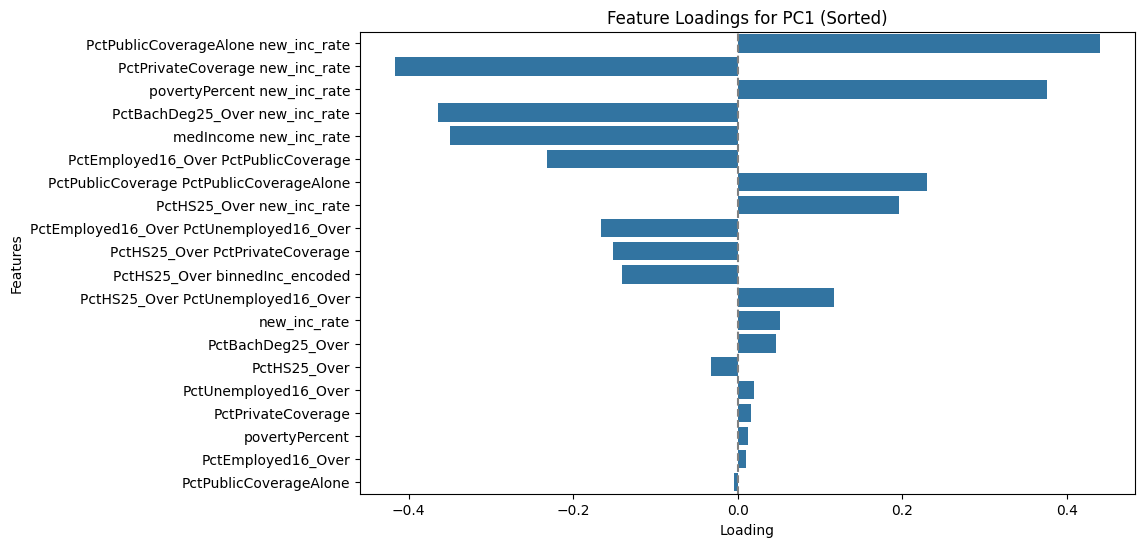

Features sorted by importance for PC2:
                                               PC2   abs_PC2
PctPublicCoverageAlone                    0.407000  0.407000
PctPrivateCoverage                       -0.400584  0.400584
povertyPercent                            0.398643  0.398643
PctEmployed16_Over                       -0.379496  0.379496
PctUnemployed16_Over                      0.346248  0.346248
PctBachDeg25_Over                        -0.319655  0.319655
PctEmployed16_Over PctUnemployed16_Over  -0.204096  0.204096
PctPublicCoverage PctPublicCoverageAlone  0.191860  0.191860
PctHS25_Over                              0.167510  0.167510
PctEmployed16_Over PctPublicCoverage     -0.157061  0.157061
PctHS25_Over binnedInc_encoded            0.072234  0.072234
PctHS25_Over PctPrivateCoverage           0.069664  0.069664
PctPrivateCoverage new_inc_rate           0.058552  0.058552
PctPublicCoverageAlone new_inc_rate      -0.045152  0.045152
PctBachDeg25_Over new_inc_rate            0.03

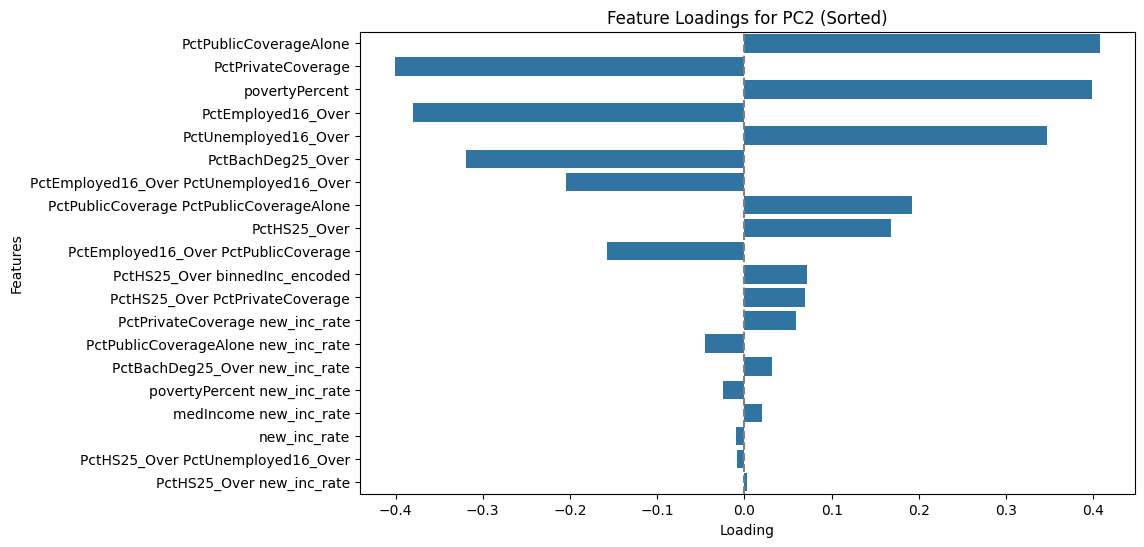

Features sorted by importance for PC3:
                                               PC3   abs_PC3
PctPublicCoverage PctPublicCoverageAlone  0.451896  0.451896
PctEmployed16_Over PctPublicCoverage     -0.434410  0.434410
PctHS25_Over PctPrivateCoverage          -0.329799  0.329799
PctEmployed16_Over PctUnemployed16_Over  -0.283858  0.283858
PctHS25_Over binnedInc_encoded           -0.274062  0.274062
PctBachDeg25_Over                         0.224966  0.224966
PctHS25_Over                             -0.217479  0.217479
PctPrivateCoverage new_inc_rate           0.211355  0.211355
PctPublicCoverageAlone new_inc_rate      -0.210731  0.210731
PctHS25_Over PctUnemployed16_Over         0.204622  0.204622
PctBachDeg25_Over new_inc_rate            0.183975  0.183975
povertyPercent new_inc_rate              -0.158630  0.158630
medIncome new_inc_rate                    0.135928  0.135928
PctHS25_Over new_inc_rate                -0.130097  0.130097
PctPrivateCoverage                        0.07

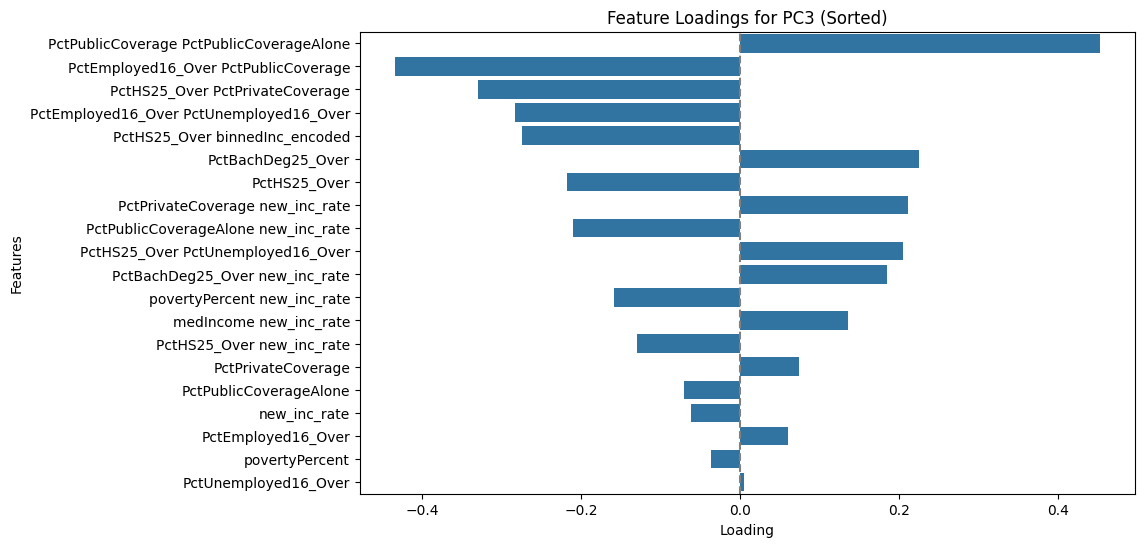

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loadings' is your DataFrame of PCA loadings
# Assuming 'selected_components' contains the indices of the components to be visualized (from 0 onwards)

for i in selected_components:  # Iterate over the selected components
    pc_name = f'PC{i+1}'  # PCA components are named as PC1, PC2, etc.
    
    # Calculate the absolute values of the loadings for the current PC
    loadings[f'abs_{pc_name}'] = abs(loadings[pc_name])
    
    # Sort features by their absolute loadings for the current PC
    sorted_loadings = loadings.sort_values(by=f'abs_{pc_name}', ascending=False)
    
    # Display sorted features for the current PC
    print(f"Features sorted by importance for {pc_name}:")
    print(sorted_loadings[[pc_name, f'abs_{pc_name}']])
    
    # Plotting the sorted loadings for the current principal component
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_loadings[pc_name], y=sorted_loadings.index)
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.title(f'Feature Loadings for {pc_name} (Sorted)')
    plt.xlabel('Loading')
    plt.ylabel('Features')
    plt.show()


### Storing final 14 features

In [66]:
# Initialize an empty set to store the final selected features
final_selected_features = set()

# Iterate through each selected component
for i in selected_components:  # 'selected_components' contains the PCs that exceed the variance threshold
    pc_name = f'PC{i+1}'  # Dynamically generate PC names like 'PC1', 'PC2', etc.
    
    # Calculate absolute loadings for the current PC
    loadings[f'abs_{pc_name}'] = abs(loadings[pc_name])
    
    # Set a threshold for loadings (you can adjust this threshold to filter important features)
    loading_threshold = 0.3  # Example threshold, can be modified based on requirements
    
    # Select features where the absolute loading is greater than the threshold
    selected_features = loadings[loadings[f'abs_{pc_name}'] > loading_threshold].index.tolist()
    
    # Add these features to the final selected features set (to avoid duplicates)
    final_selected_features.update(selected_features)

# Create a list of the final selected features
final_selected_features = list(final_selected_features)

# Create a new DataFrame with the selected features from the original dataset
final_x = X_rfe_selected[final_selected_features]

# Display the new DataFrame
print("Selected features DataFrame (final_x):")
print(final_x.shape)
final_x.head()


Selected features DataFrame (final_x):
(2895, 14)


,povertyPercent new_inc_rate,PctEmployed16_Over PctPublicCoverage,PctPublicCoverage PctPublicCoverageAlone,PctPublicCoverageAlone new_inc_rate,PctHS25_Over PctPrivateCoverage,PctEmployed16_Over,povertyPercent,PctUnemployed16_Over,PctBachDeg25_Over,PctPrivateCoverage,PctPublicCoverageAlone,PctPrivateCoverage new_inc_rate,medIncome new_inc_rate,PctBachDeg25_Over new_inc_rate
0,-0.693441,0.118041,0.375694,-0.672179,-1.679150,-0.270958,-0.889667,0.041232,1.186128,1.014166,-0.862388,0.790481,0.963928,0.924515
1,-0.183297,-0.139840,0.432332,0.454223,-0.695922,0.210180,0.262219,-0.016727,1.764599,0.553813,-0.649796,-0.387129,-0.065294,-1.233497
2,0.661844,-0.732921,0.220535,-0.548487,0.047137,-0.992664,-0.360422,-0.248561,0.514355,-0.056860,0.298691,0.104412,-0.357669,-0.944513
3,-0.010280,-0.807241,1.073826,-0.335105,0.254326,-0.703982,0.028729,1.229380,-0.735888,-0.554793,0.936466,0.198527,0.081962,0.263331
4,1.262107,-0.702256,0.549578,-1.028959,0.051302,-0.716010,-0.687309,-0.886104,0.327752,-0.254154,0.560342,0.466704,-0.450208,-0.601852


In [67]:
final_x.to_csv('../data/Features_6_FinalPCASelection.csv', index=False)

## Final Feature List:

In [68]:
print("-------Final Selected Features--------\n")
for i in range(0,len(final_selected_features)):
    print(f' {i+1} --{final_selected_features[i]}')

-------Final Selected Features--------

 1 --povertyPercent new_inc_rate
 2 --PctEmployed16_Over PctPublicCoverage
 3 --PctPublicCoverage PctPublicCoverageAlone
 4 --PctPublicCoverageAlone new_inc_rate
 5 --PctHS25_Over PctPrivateCoverage
 6 --PctEmployed16_Over
 7 --povertyPercent
 8 --PctUnemployed16_Over
 9 --PctBachDeg25_Over
 10 --PctPrivateCoverage
 11 --PctPublicCoverageAlone
 12 --PctPrivateCoverage new_inc_rate
 13 --medIncome new_inc_rate
 14 --PctBachDeg25_Over new_inc_rate


### Exporting Data:

In [69]:
final_x.to_csv('../data/Features.csv', index=False)
y.to_csv('../data/Target.csv', index=False)